NOTE: THIS IS A DRAFT, AS THIS WAS NOT NEEDED LATER ON

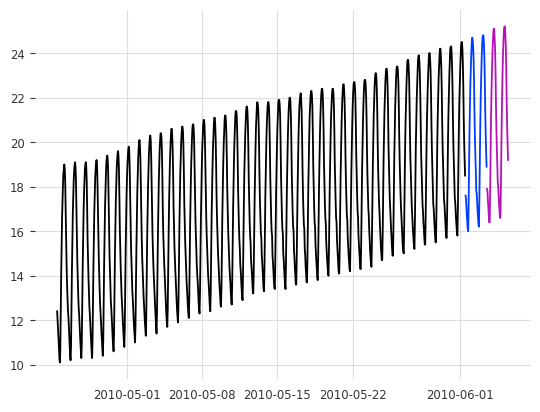

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel, TransformerModel
from darts.metrics import r2_score
from error_metrics import smape, mase  

df_train = pd.read_csv("Hourly_wdates.csv", index_col=0)
df_test = pd.read_csv("Hourly-test.csv",index_col=0)

n = 257

train_series = df_train.iloc[n - 1, 2:].dropna()
train_series = train_series[train_series > 0]
train_series = pd.to_numeric(train_series, errors='coerce')

initial_date = df_train.iloc[n - 1, 0]
index = pd.date_range(start=initial_date, periods=len(train_series), freq='h')
train_series.index = index

test_series = df_test.iloc[n - 1, :].dropna()
test_series = test_series[test_series > 0]
test_series = pd.to_numeric(test_series, errors='coerce')

last_date_train = train_series.index[-1]
index_test = pd.date_range(start=last_date_train  + pd.Timedelta(hours=1) , periods=len(test_series), freq='h')
test_series.index = index_test

validation_size = 48  
train_series_main = train_series.iloc[:-validation_size]  
train_series_val = train_series.iloc[-validation_size:]


plt.plot(train_series_main)
plt.plot(train_series_val)
plt.plot(test_series)


# NEW STRATETGIEA

C:\Users\elshe\AppData\Local\Temp\ipykernel_22916\3855262569.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_22916\3855262569.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

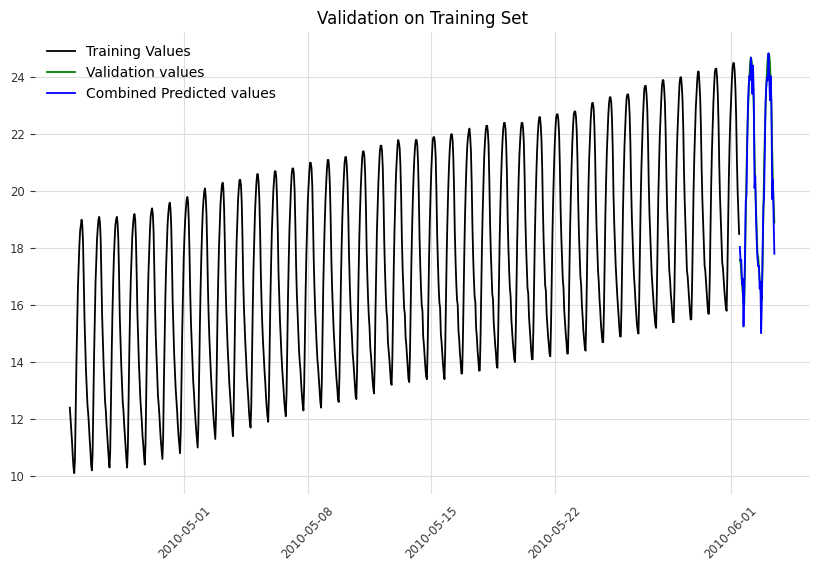

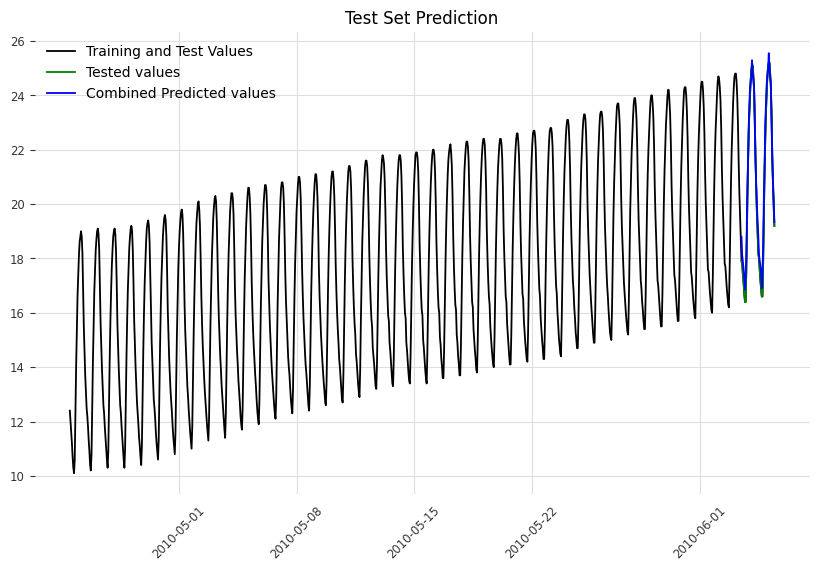

Validation on Train Set:
Metric                                            Value
------------------------------------------------  -----------------
Symmetric mean absolute percentage error (sMAPE)  2.38 %
Mean Absolute Scaled Error (MASE)                 3.05
R2 Score                                          0.959734550873564
Test Set Prediction:
Metric                                            Value
------------------------------------------------  ------------------
Symmetric mean absolute percentage error (sMAPE)  1.76 %
Mean Absolute Scaled Error (MASE)                 2.21
R2 Score                                          0.9823340682309594


In [2]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel, TransformerModel
from darts.metrics import r2_score
from error_metrics import smape, mase  
from scipy.optimize import minimize
import numpy as np
from sklearn.linear_model import LinearRegression

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)

n = 257

df = df_train.iloc[n - 1, 2:].dropna()
df = df[df > 0].astype(float)
initial_date = df_train.iloc[n - 1, 0]
df.index = pd.date_range(start=initial_date, periods=len(df), freq='H')

tested = df_test.iloc[n - 1, :].dropna()
tested = tested[tested > 0].astype(float)
last_date_train = df.index[-1]
index_test = pd.date_range(start=last_date_train + pd.Timedelta(hours=1), periods=len(tested), freq='H')
tested.index = index_test

validation_size = 48
train_series = df.iloc[:-validation_size]
val_series = df.iloc[-validation_size:]

train_series_ts = TimeSeries.from_series(train_series)
val_series_ts = TimeSeries.from_series(val_series)
test_series_ts = TimeSeries.from_series(tested)

nbeats_model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=24,
    n_epochs=15,
    num_stacks=3,
    num_blocks=3,
    num_layers=3,
    dropout=0.1,
    layer_widths=512,
    batch_size=32,
    random_state=42
)

nbeats_model.fit(train_series_ts, val_series=val_series_ts)

forecast_nbeats_train = nbeats_model.predict(n=validation_size).values().flatten()
actual_data_nbeats_train = val_series.values.flatten()

transformer_model = TransformerModel(
    input_chunk_length=24,
    output_chunk_length=24,
    n_epochs=15,
    d_model=64,
    nhead=4,
    num_encoder_layers=3,
    num_decoder_layers=3,
    dropout=0.1,
    activation="relu",
    batch_size=32,
    random_state=42
)

transformer_model.fit(train_series_ts, val_series=val_series_ts)

forecast_transformer_train = transformer_model.predict(n=validation_size).values().flatten()
actual_data_transformer_train = val_series.values.flatten()


def ensemble_predictions(weights, preds1, preds2):
    return weights[0] * preds1 + weights[1] * preds2

def ensemble_error(weights, actual, preds1, preds2):
    combined_preds = ensemble_predictions(weights, preds1, preds2)
    return smape(actual, combined_preds)

initial_weights = [0.5, 0.5]
res = minimize(ensemble_error, initial_weights, args=(actual_data_transformer_train, forecast_nbeats_train, forecast_transformer_train), bounds=[(0, 1), (0, 1)])
optimal_weights = res.x

combined_predictions_train = ensemble_predictions(optimal_weights, forecast_nbeats_train, forecast_transformer_train)

smape_value_train = round(smape(actual_data_transformer_train, combined_predictions_train), 2)
mase_value_train = round(mase(df.values, actual_data_transformer_train, combined_predictions_train, 24), 2)
r2_train = r2_score(
    TimeSeries.from_series(pd.Series(actual_data_transformer_train, index=val_series_ts.time_index)),
    TimeSeries.from_series(pd.Series(combined_predictions_train, index=val_series_ts.time_index))
)

series_with_val = TimeSeries.from_series(pd.concat([train_series, val_series]))
nbeats_model.fit(series_with_val)
forecast_nbeats = nbeats_model.predict(n=len(tested)).values().flatten()

transformer_model.fit(series_with_val)
forecast_transformer = transformer_model.predict(n=len(tested)).values().flatten()

combined_predictions = ensemble_predictions(optimal_weights, forecast_nbeats, forecast_transformer)

smape_value_train = round(smape(actual_data_transformer_train, combined_predictions_train), 2)
mase_value_train = round(mase(df.values, actual_data_transformer_train, combined_predictions_train, 24), 2)
r2_train = r2_score(
    TimeSeries.from_series(pd.Series(actual_data_transformer_train, index=val_series_ts.time_index)),
    TimeSeries.from_series(pd.Series(combined_predictions_train, index=val_series_ts.time_index))
)

series_with_val = TimeSeries.from_series(pd.concat([train_series, val_series]))
nbeats_model.fit(series_with_val)
forecast_nbeats = nbeats_model.predict(n=len(tested)).values().flatten()

transformer_model.fit(series_with_val)
forecast_transformer = transformer_model.predict(n=len(tested)).values().flatten()

combined_predictions = ensemble_predictions(optimal_weights, forecast_nbeats, forecast_transformer)

smape_value = round(smape(tested.values, combined_predictions), 2)
mase_value = round(mase(df.values, tested.values, combined_predictions, 24), 2)
r2 = r2_score(
    TimeSeries.from_series(pd.Series(tested.values, index=test_series_ts.time_index)),
    TimeSeries.from_series(pd.Series(combined_predictions, index=test_series_ts.time_index))
)

plt.figure(figsize=(10, 6))
plt.plot(df.index[:-validation_size], df.values[:-validation_size], label='Training Values')
plt.plot(df.index[-validation_size:], actual_data_transformer_train, color='green', label="Validation values")
plt.plot(df.index[-validation_size:], combined_predictions_train, color='blue', label="Combined Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title("Validation on Training Set")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(pd.concat([df, tested]).index, pd.concat([df, tested]), label='Training and Test Values')
plt.plot(tested.index, tested.values, color='green', label="Tested values")
plt.plot(tested.index, combined_predictions, color='blue', label="Combined Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title("Test Set Prediction")
plt.show()

table_train = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value_train} %"],
               ["Mean Absolute Scaled Error (MASE)", mase_value_train],
               ["R2 Score", r2_train]]

print("Validation on Train Set:")
print(tabulate(table_train, headers=["Metric", "Value"], tablefmt="simple"))

table_test = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value} %"],
              ["Mean Absolute Scaled Error (MASE)", mase_value],
              ["R2 Score", r2]]

print("Test Set Prediction:")
print(tabulate(table_test, headers=["Metric", "Value"], tablefmt="simple"))


In [3]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel, TransformerModel
from darts.metrics import r2_score
from error_metrics import smape, mase 
from scipy.optimize import minimize

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)

smape_values = []
mase_values = []

# Function for ensemble predictions
def ensemble_predictions(weights, preds1, preds2):
    return weights[0] * preds1 + weights[1] * preds2

# Function to compute ensemble error for optimization
def ensemble_error(weights, actual, preds1, preds2):
    combined_preds = ensemble_predictions(weights, preds1, preds2)
    return smape(actual, combined_preds)

# Initialize a list to store results for saving to CSV
results = []

for n in range(1, 415):
    df = df_train.iloc[n - 1, 2:].dropna()
    df = df[df > 0].astype(float)
    initial_date = df_train.iloc[n - 1, 0]
    df.index = pd.date_range(start=initial_date, periods=len(df), freq='H')

    tested = df_test.iloc[n - 1, :].dropna()
    tested = tested[tested > 0].astype(float)
    last_date_train = df.index[-1]
    index_test = pd.date_range(start=last_date_train + pd.Timedelta(hours=1), periods=len(tested), freq='H')
    tested.index = index_test

    validation_size = 48
    train_series = df.iloc[:-validation_size]
    val_series = df.iloc[-validation_size:]

    train_series_ts = TimeSeries.from_series(train_series)
    val_series_ts = TimeSeries.from_series(val_series)
    test_series_ts = TimeSeries.from_series(tested)

    nbeats_model = NBEATSModel(
        input_chunk_length=24,
        output_chunk_length=24,
        n_epochs=15,
        num_stacks=3,
        num_blocks=3,
        num_layers=3,
        dropout=0.1,
        layer_widths=512,
        batch_size=32,
        random_state=42
    )

    nbeats_model.fit(train_series_ts, val_series=val_series_ts)

    forecast_nbeats_train = nbeats_model.predict(n=validation_size).values().flatten()
    actual_data_nbeats_train = val_series.values.flatten()

    transformer_model = TransformerModel(
        input_chunk_length=24,
        output_chunk_length=24,
        n_epochs=15,
        d_model=64,
        nhead=4,
        num_encoder_layers=3,
        num_decoder_layers=3,
        dropout=0.1,
        activation="relu",
        batch_size=32,
        random_state=42
    )

    transformer_model.fit(train_series_ts, val_series=val_series_ts)

    forecast_transformer_train = transformer_model.predict(n=validation_size).values().flatten()
    actual_data_transformer_train = val_series.values.flatten()

    initial_weights = [0.5, 0.5]
    res = minimize(ensemble_error, initial_weights, args=(actual_data_transformer_train, forecast_nbeats_train, forecast_transformer_train), bounds=[(0, 1), (0, 1)])
    optimal_weights = res.x

    combined_predictions_train = ensemble_predictions(optimal_weights, forecast_nbeats_train, forecast_transformer_train)

    smape_value_train = smape(actual_data_transformer_train, combined_predictions_train)
    mase_value_train = mase(df.values, actual_data_transformer_train, combined_predictions_train, 24)

    smape_values.append(smape_value_train)
    mase_values.append(mase_value_train)

    results.append([n, smape_value_train, mase_value_train])

    print(f"Processed n={n}: SMAPE={smape_value_train:.2f}, MASE={mase_value_train:.2f}")

# Save the results to a CSV file
results_df = pd.DataFrame(results, columns=['n', 'SMAPE', 'MASE'])
results_df.to_csv('model_evaluation_metrics.csv', index=False)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 415), smape_values, marker='o', linestyle='-')
plt.title('SMAPE for Different Values of n')
plt.xlabel('n')
plt.ylabel('SMAPE')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 415), mase_values, marker='o', linestyle='-')
plt.title('MASE for Different Values of n')
plt.xlabel('n')
plt.ylabel('MASE')
plt.grid(True)
plt.show()


C:\Users\elshe\AppData\Local\Temp\ipykernel_22916\3500734636.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_22916\3500734636.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Processed n=1: SMAPE=4.65, MASE=0.80


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Processed n=2: SMAPE=4.15, MASE=0.70


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Processed n=3: SMAPE=7.92, MASE=1.20


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Processed n=4: SMAPE=6.37, MASE=1.23


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 4.9 M 
---------------------------------------------------
4.9 M     Trainable params
2.7 K     Non-trainable params
4.9 M     Total params
19.567    Total estimated model params size (MB)


Processed n=5: SMAPE=13.69, MASE=1.93


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]